In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def handle_outliers(data, cols=None):
    if not cols:
        cols = data.select_dtypes(include=['number']).columns.tolist()

    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)
        data = data[~outliers]
        
    return data


In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [5]:
df = handle_outliers(df)

In [7]:
# df.info()

In [8]:
df.price.max()

190.0

In [9]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [11]:
# df.isnull().sum()

In [12]:
df = df.dropna(subset=['price'])
df['society'] = df['society'].fillna('Unknown')

In [13]:
df.dropna(inplace=True)

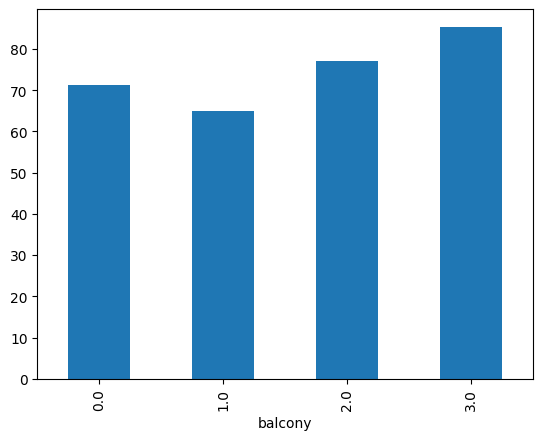

In [14]:
average_prices = df.groupby('balcony')['price'].mean()
average_prices.plot(kind='bar')
plt.show()

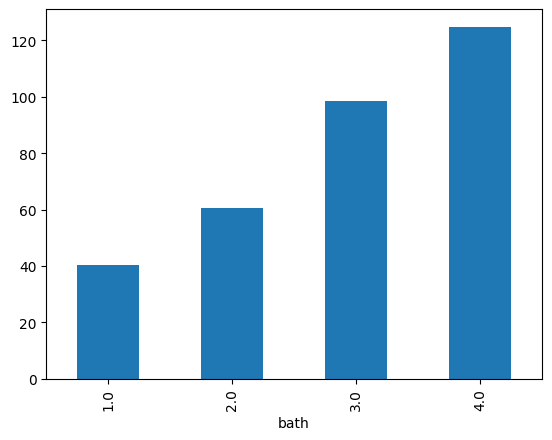

In [15]:
average_prices = df.groupby('bath')['price'].mean()
average_prices.plot(kind='bar')
plt.show()

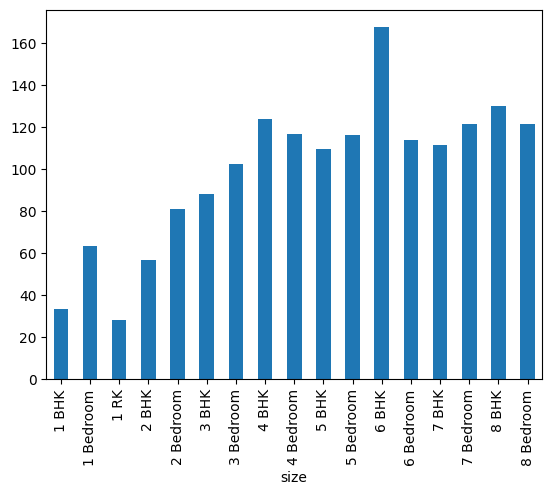

In [16]:
average_prices = df.groupby('size')['price'].mean()
average_prices.plot(kind='bar')
plt.show()

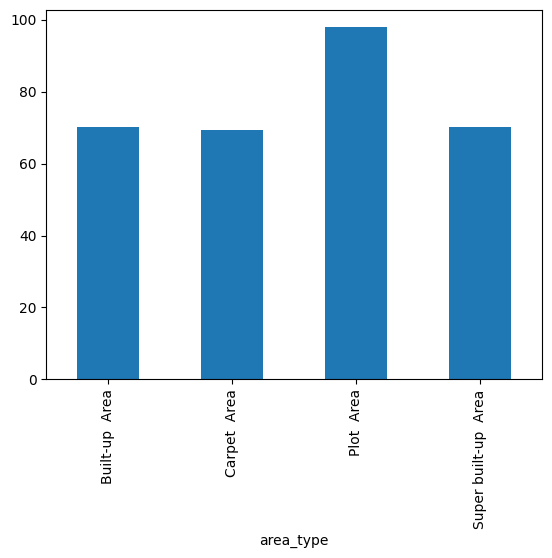

In [17]:
average_prices = df.groupby('area_type')['price'].mean()
average_prices.plot(kind='bar')
plt.show()